## Part 1 - Theory

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

#### 1.1 The invariant distribution of $X_t$

**Definition** Consider a stochastic process $(X_t)_{t\geq 0}$ with state space $\chi = \left\{ 1,2,...,n\right\} $ and transition matrix $P$. The distribution $\pi = \left(\pi_1, \pi_2, ...,\pi_n \right) \in \mathbb{R}^n$ on $\chi$ is a stationary distribution for $(X_t)_{t\geq 0}$ if:
$$ \pi = \pi P $$

#### 1.2 The limiting distribution of $X_t$

**Definition** Consider a stochastic process $(X_t)_{t\geq 0}$ with state space $\chi = \left\{ 1,2,...,n\right\} $ and transition matrix $P$. The distribution $\pi = \left(\pi_1, \pi_2, ...,\pi_n \right) \in \mathbb{R}^n$ on $\chi$ is the limiting distribution of $(X_t)_{t\geq 0}$ if:
$$ \pi_j = \lim_{t \to +\infty} P^t_{ij} \quad\quad \forall i,j\in\chi$$

#### 1.3 The asymptotic distribution of $X_t$

**Definition** Consider a stochastic process $(X_t)_{t\geq 0}$ with state space $\chi = \left\{ 1,2,...,n\right\} $ and transition matrix $P$. The distribution $\pi = \left(\pi_1, \pi_2, ...,\pi_n \right) \in \mathbb{R}^n$ on $\chi$ is the asymptotic distribution of $(X_t)_{t\geq 0}$ if:
$$ \pi_j = \lim_{t \to +\infty} \frac{\text{visits to } X_t \text{ in state } j \mbox{ before time }t \mbox{ given } X_0 =i }{t} \quad\quad \forall i,j \in \chi$$

#### 1.4 The Convergence Theorem

**Theorem** Consider a stochastic process $(X_t)_{t\geq 0}$ with state space $\chi$ and transition matrix $P$. If $\chi$ is finite, and $X_t$ is irreducible and aperiodic, then the unique stationary distribution $\pi$ is also the limiting distribution of $X_t$ and the asymptotic distribution of $X_t$.

This result allows us to pick the definition that we prefer in terms of computations required, and derive all three distributions at once.

## Part 2 - Computation

#### Point 1 - Checking convergence theorem conditions

We have $\chi = {1,2,3,4,5}$. Its transition matrix $P$ is:

$$ P = \left(\begin{array}{ccc}
P_{11} & P_{12} & P_{13} & P_{14} & P_{15} \\
P_{21} & P_{22} & P_{23} & P_{24} & P_{25} \\
P_{31} & P_{32} & P_{33} & P_{34} & P_{35} \\
P_{41} & P_{42} & P_{43} & P_{44} & P_{45} \\
P_{51} & P_{52} & P_{53} & P_{54} & P_{55}
\end{array}\right) = 
\left(\begin{array}{ccc}
0 & 1/3 & 1/3 & 1/3 & 0 \\
0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1/2 & 0 & 1/2 \\
0 & 0 & 0 & 1 & 0
\end{array}\right)$$ 

We immediately see that $\chi$ is finite. We also see that $X_t$ is not periodic, as each state can be visited at irregular intervals. For what concerns irreducibility, we evaluate communicating states:

$$ \begin{array}{ccc}  & 2 \leftarrow 1 & 3 \leftarrow 1 & 4 \leftarrow 1 &  \\
 & & & 4 \leftarrow 2 &  \\
 1 \leftarrow 3 & & & & \\ 
 &  & 3 \leftarrow 4 & & 5 \leftarrow 4 \\
 & & & 4 \leftarrow 5
\end{array} $$

We determine the presence of 1 communicating class $S \subseteq \chi$. We have $ 1\leftrightarrow 3$, and $ 3 \leftarrow 4$, so $S=\{1,3,4\}$ are communicating. But then $4 \leftrightarrow 5$, so $5 \in S$. Also, since $1 \leftarrow 3$ and $2 \leftarrow 1$, we see that $2$ also communicates indirectly with $4$ and $5$. So $2 \in S$. We have proved that $X_t$ is irreducible, as all states communicate with each other.

$X_t$ meets the assumptions of the convergence theorem.

#### Point 2.1 - Calculating the invariant distribution

In [200]:
P = np.array([[0,1/3,1/3,1/3,0],
              [0,0,0,1,0],
              [1,0,0,0,0],
              [0,0,1/2,0,1/2],
              [0,0,0,1,0]])

(i) We need to solve the following linear system:

$$ \pi P = \pi $$
$$ \begin{cases} 
\frac{1}{3} \pi_2 + \frac{1}{3} \pi_3 + \frac{1}{3} \pi_4 = \pi_1 \\
\pi_4 = \pi_2 \\
\pi_1 = \pi_3 \\
\frac{1}{2} \pi_3 + \frac{1}{2} \pi_5 = \pi_4 \\
\pi_4 = \pi_5 \\
\pi_1 + \pi_2 + \pi_3 + \pi_4 + \pi_5 = 1
\end{cases}$$

In [245]:
eigenvalues = scipy.linalg.eig(P, left = True, right = False)[0]
eigenvectors = scipy.linalg.eig(P, left = True, right = False)[1]

print(eigenvalues)
print(eigenvectors)

[-7.88675135e-01+0.j -2.11324865e-01+0.j  7.73521627e-17+0.j
  1.00000000e+00+0.j  0.00000000e+00+0.j]
[[-6.64023332e-01  4.17681254e-01  1.64088716e-16  4.80384461e-01
   0.00000000e+00]
 [ 2.80649282e-01 -6.58829639e-01  7.07106781e-01  1.60128154e-01
  -7.07106781e-01]
 [ 5.23698691e-01 -8.82664348e-02  8.44478578e-33  4.80384461e-01
   0.00000000e+00]
 [-3.83374049e-01 -2.41148385e-01 -1.09392478e-16  6.40512615e-01
   0.00000000e+00]
 [ 2.43049408e-01  5.70563204e-01 -7.07106781e-01  3.20256308e-01
   7.07106781e-01]]


Since the fourth entry is 1, we pick the fourth eigenvector in the eigenvector array and we normalize it.

In [244]:
pi_inv = abs(eigenvectors[1])/np.sum(eigenvectors[1])
pi_inv

array([-1.28707382, -3.02143079, -3.24283255, -0.73435697, -3.24283255])

#### Point 2.2 - Calculating the limiting distribution

In [88]:
N = 100000
X_0 = np.array([1,0,0,0,0])
P_limit = P @ X_0

for i in range(0,N):
    P_limit = P_limit @ P

P_limit
print(P_limit)

[0.23076923 0.07692308 0.23076923 0.30769231 0.15384615]


#### Point 2.3 - Calculating the asymptotic distribution (FIX PLOTS)

In [138]:
np.random.seed(123)

N = 100000
visits = [0,0,0,0,0]

convergence_df_dict = {'freq.1': np.zeros(N),
                      'freq.2': np.zeros(N),
                      'freq.3': np.zeros(N),
                      'freq.4': np.zeros(N),
                      'freq.5': np.zeros(N),}

convergence_df = pd.DataFrame(convergence_df_dict)

X_0 = 2
X_past = X_0
chi = [1,2,3,4,5]

for i in range(1,N):
    X_curr = np.random.choice(chi, p = P[X_past-1])  #we pick the right row of P for the probabilities
    
    visits[X_curr-1] = visits[X_curr-1] + 1
    convergence_df.iloc[i] = np.array(visits)/i
    
    X_past = X_curr

P_asympt = np.array(visits)/N

In [139]:
P_asympt

array([0.23008, 0.07681, 0.23008, 0.30807, 0.15495])

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6s/ljt_tdhn2332n40p605w9dgr0000gn/T/ipykernel_11503/3493463082.py:17: SyntaxWarning: invalid escape sequence '\p'
  ax[row,j].set_title('Log absolute deviations from $\pi_{inv}($'+str(j+1)+'$)$')


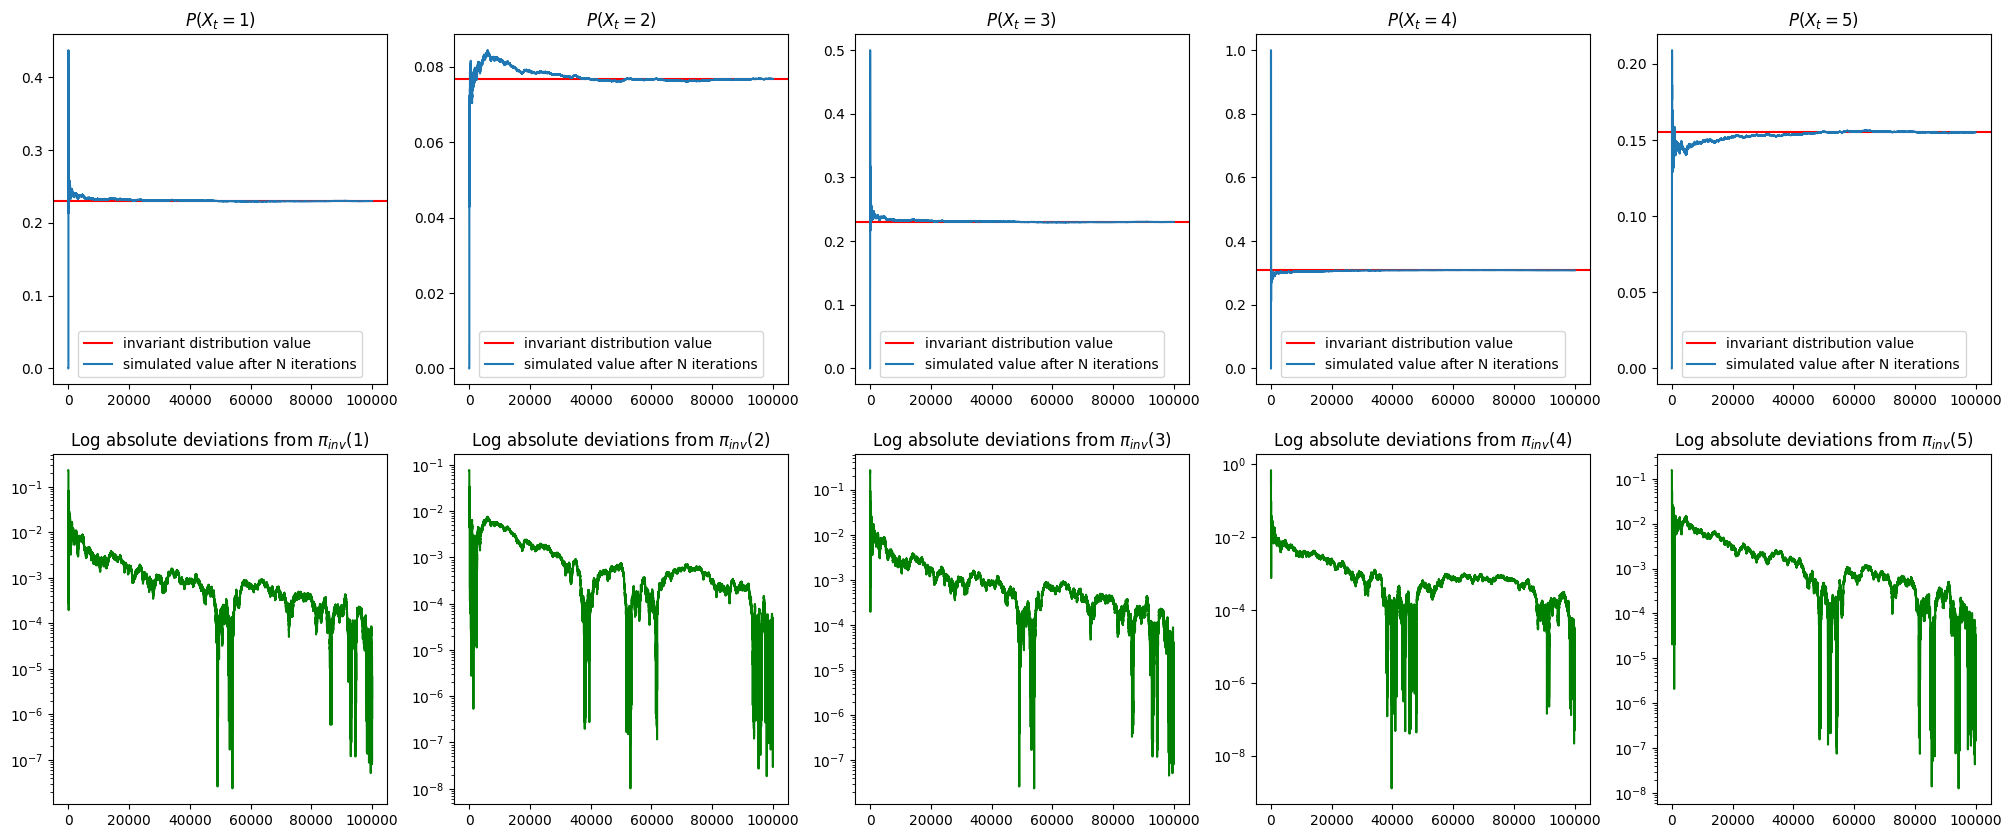

In [198]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25,10))
i = 0
j = 0
for row in [0,1]:
    for item in convergence_df.columns:
        if row == 0:
            ax[row,i].axhline(y = P_asympt[i], color = 'red', label = 'invariant distribution value')
            ax[row,i].plot(convergence_df[item], label = 'simulated value after N iterations')
            ax[row,i].set_title('$P(X_t = $'+str(i+1)+"$)$")

            ax[row,i].legend(loc = 'lower center')
            i = i+1
        else:
            ax[row,j].axhline(y = 0, color = 'grey')
            ax[row,j].plot(abs(convergence_df[item] - P_asympt[j]), color = 'green')
            ax[row,j].set_yscale("log")
            ax[row,j].set_title('Log absolute deviations from $\pi_{inv}($'+str(j+1)+'$)$')
            j = j+1

#### Point 3 - Results on website rankings (FIX)

Here are the results on what we expect the rankings to be, based on the three methods.

In [238]:
pd.DataFrame({'Rank': [1,2,3,4,5],
              'Invariant': list(pi_inv),
              'Limiting': P_limit,
              'Asymptotic': P_asympt})

,Rank,Invariant,Limiting,Asymptotic
0,1,2.397559e+01,0.230769,0.23008
1,2,1.508103e+01,0.076923,0.07681
2,3,6.841228e-15,0.230769,0.23008
3,4,4.005662e+01,0.307692,0.30807
4,5,0.000000e+00,0.153846,0.15495


## Part 3 - More computation